In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
import datasets

In [ ]:
# decompose acf pacf ar ma arma arima kalman fft freq resample
# https://github.com/burakbayramli/kod/tree/master/books/Introductory_Time_Series_with_R_Metcalfe

In [140]:
# ts = datasets.maine()
# ts = datasets.passengers()
# ts = datasets.sunspots()
# ts = datasets.exchange()
# ts = datasets.warming()
# ts = datasets.unemployment(2016, 2016)
# ts = datasets.choc()
# ts = datasets.beer()
# ts = datasets.elec()
# ts = datasets.inflation(2000, 2016)
# ts = datasets.stock('AAPL', '2016-01-01', '2016-01-11')
# ts = datasets.temperature('2016-10-01', '2016-10-06')
# x = datasets.wave()

In [20]:
pacf = sm.tsa.pacf(ts, nlags = 2)    
acf = sm.tsa.acf(ts, nlags = 60 * 60 * 24)    
print acf[:4]
print np.argsort(acf)[::-1][:10]    

[ 1.          0.82020129  0.45126849  0.03957655]
[ 0  1 10 11  9 12  2 21 22 32]


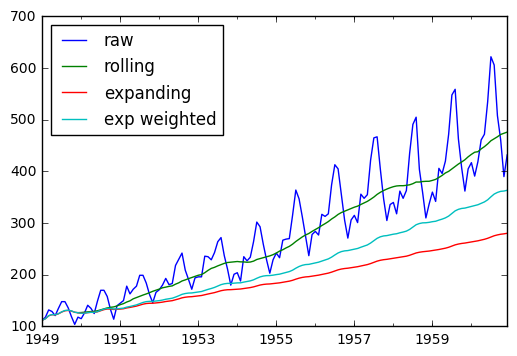

In [129]:
ts.plot(label = 'raw')
ts.rolling(12).mean().plot(label = 'rolling')
ts.expanding().mean().plot(label = 'expanding')
ts.ewm(com = 50).mean().plot(label = 'exp weighted')
plt.legend(loc ='upper left')
plt.show()

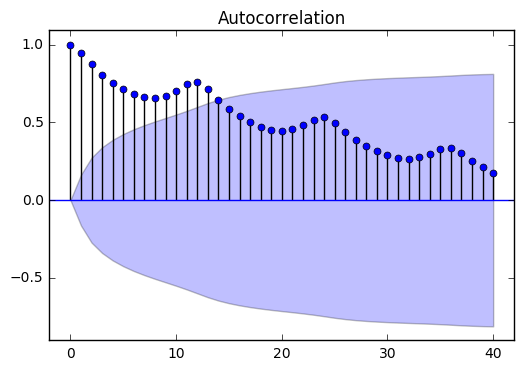

In [52]:
sm.graphics.tsa.plot_acf(ts, lags=40)
# sm.graphics.tsa.plot_pacf(ts, lags=40)
plt.show()

In [19]:
fit = sm.tsa.AR(ts).fit(3)
print fit.params
print fit.aic, fit.bic, fit.hqic

const    16.944345
L1.y      1.301721
L2.y     -0.509949
L3.y     -0.130250
dtype: float64
5.63580397958 5.69664687341 5.66013716178


In [61]:
fit = sm.tsa.ARMA(ts, (3, 3)).fit()
print fit.params
print fit.aic, fit.bic, fit.hqic

const      48.865608
ar.L1.y     2.546062
ar.L2.y    -2.441383
ar.L3.y     0.869939
ma.L1.y    -1.411675
ma.L2.y     0.431192
ma.L3.y     0.159175
dtype: float64
2575.6956449 2605.56237512 2587.63642059


In [164]:
ts.index.month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8])

In [315]:
seasons = ts.groupby(ts.index.month)
seasons.mean()

1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
dtype: float64

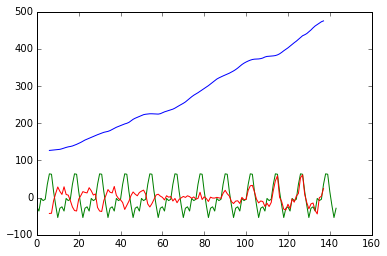

In [18]:
# see https://github.com/statsmodels/statsmodels/blob/master/statsmodels/tsa/seasonal.py
x = datasets.passengers().values
parts = sm.tsa.seasonal_decompose(x, freq = 12)
plt.plot(parts.trend)
plt.plot(parts.seasonal)
plt.plot(parts.resid)
plt.show()

In [41]:
def trend(x, freq):
    filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
    a = [np.sum(x[i : i + len(filt)] * filt) for i in range(len(x) - freq)]
    pad = [np.nan] * (freq // 2)
    return np.array(pad + a + pad)

trend(x, 12) == parts.trend

array([False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,

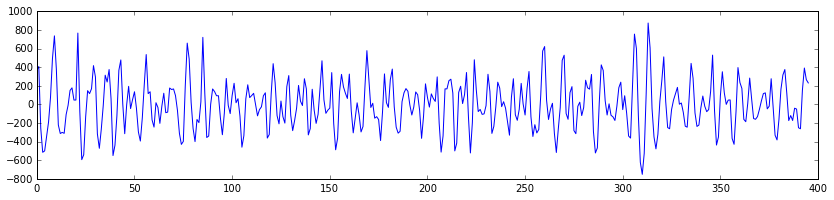

In [10]:
x = datasets.wave()
plt.figure(figsize = (14, 3))
plt.plot(x)
plt.show()